# Diabetes Prediction using Logistic Regression
**Objective:** Develop a predictive model for diabetes using clinical and demographic features.  
**Dataset:** [Pima Indians Diabetes Database (Kaggle)](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)  
**Focus Areas:** .Healthcare .MachineLearning #EDA #LogisticRegression #Classification  
**Date:** November 2025


## Problem Statement

Diabetes is a prevalent chronic condition that poses significant public health challenges worldwide.  
Accurate early prediction models can assist in timely diagnosis and management, reducing the risk of long-term complications.

This analysis aims to:
- Examine the dataset to identify relationships among clinical features.
- Clean and preprocess the data for reliable modeling.
- Develop and evaluate a **Logistic Regression** classifier for diabetes prediction.

The focus is on interpretability, as logistic regression enables clear assessment of how individual medical factors influence diabetes risk.

## Step 1: Load & Inspect Data

Initial steps include loading the dataset and checking its dimensions, data types, and basic statistics.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import warnings

#Initial Setup
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.titlesize'] = 14

In [2]:
# Load Dataset
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
print(f"Data Loaded Successfully — Shape: {df.shape} \n")
display(df.head())

Data Loaded Successfully — Shape: (768, 9) 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Basic Info & Summary Statistics
print("Data Info:\n")
df.info()

print("\nSummary Statistics:")
display(df.describe().T)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Step 2: Data Cleaning & Preprocessing

Some medical measurements contain zeros that are biologically impossible (e.g., 0 blood pressure or 0 BMI).  
This step includes:
1. Identify these features.
2. Replace invalid zeros with `NaN`.
3. Impute missing values using median values.

In [4]:
# Check for Zeros (possible missing values)
zero_counts = (df == 0).sum()
print("Zero Values per Feature:\n", zero_counts)

# Columns where 0 represents missing data
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

print("\nMissing Values After Replacement:")
print(df.isnull().sum())

# Handle Missing Values
df.fillna(df.median(), inplace=True)
print("\nMissing values handled (replaced with median).")

Zero Values per Feature:
 Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Missing Values After Replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values handled (replaced with median).


## Step 3: Exploratory Data Analysis (EDA)

Feature distributions, correlations, and relationships to the target variable (`Outcome`) will be examined.

Key questions:
- What are the typical ranges for Glucose, BMI, and Age?
- Are there visible differences between diabetic and non-diabetic groups?
- How are features correlated with each other?

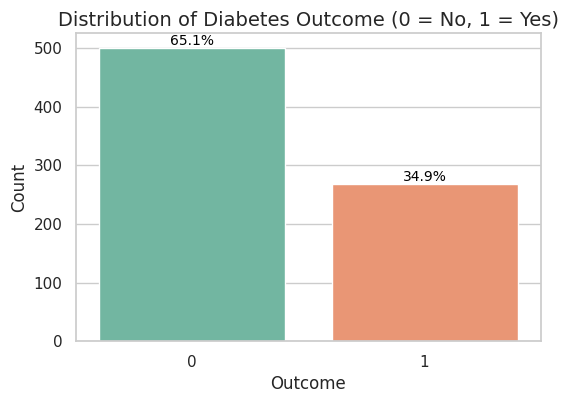

Proportion of Diabetes: 34.9%


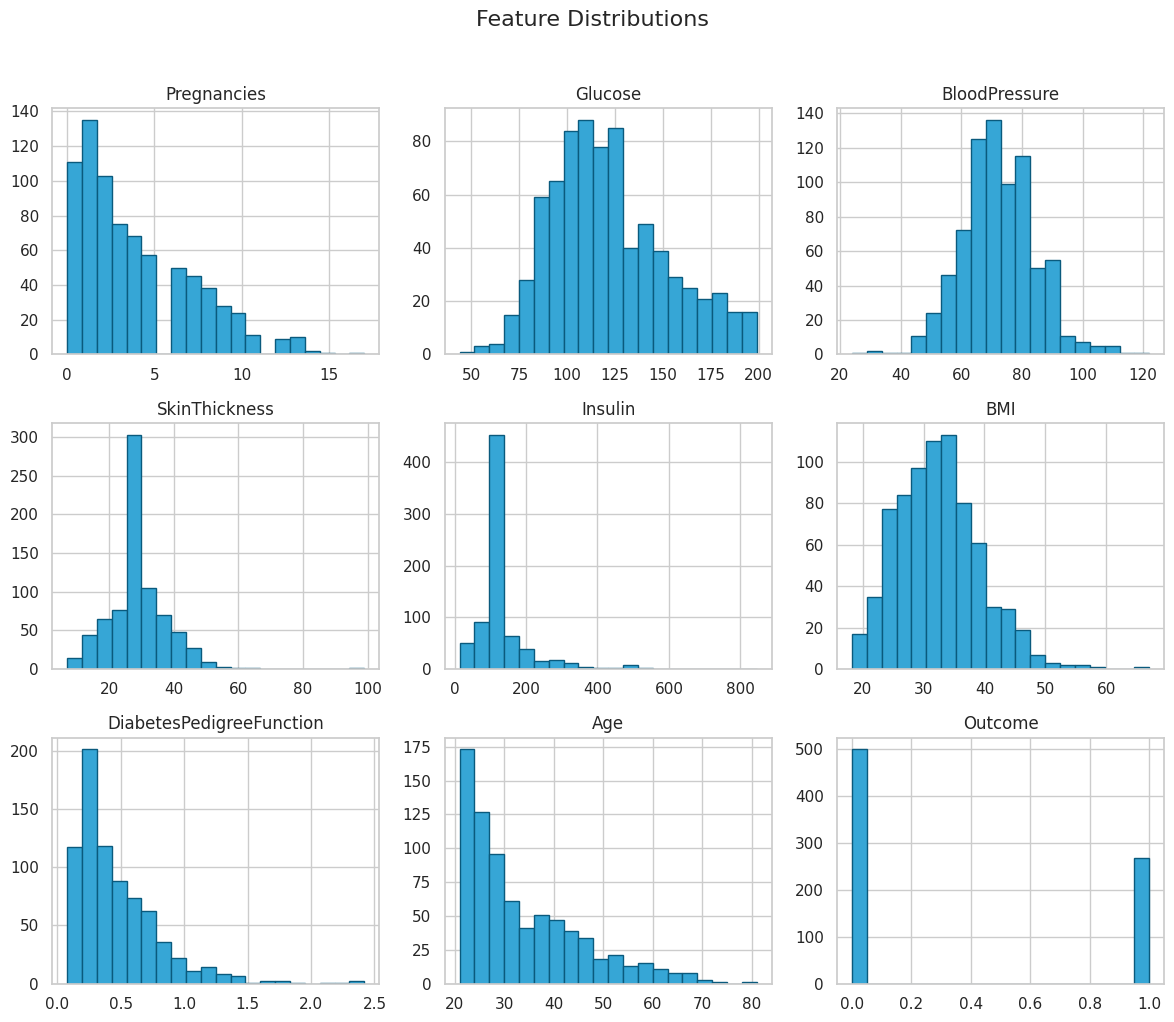

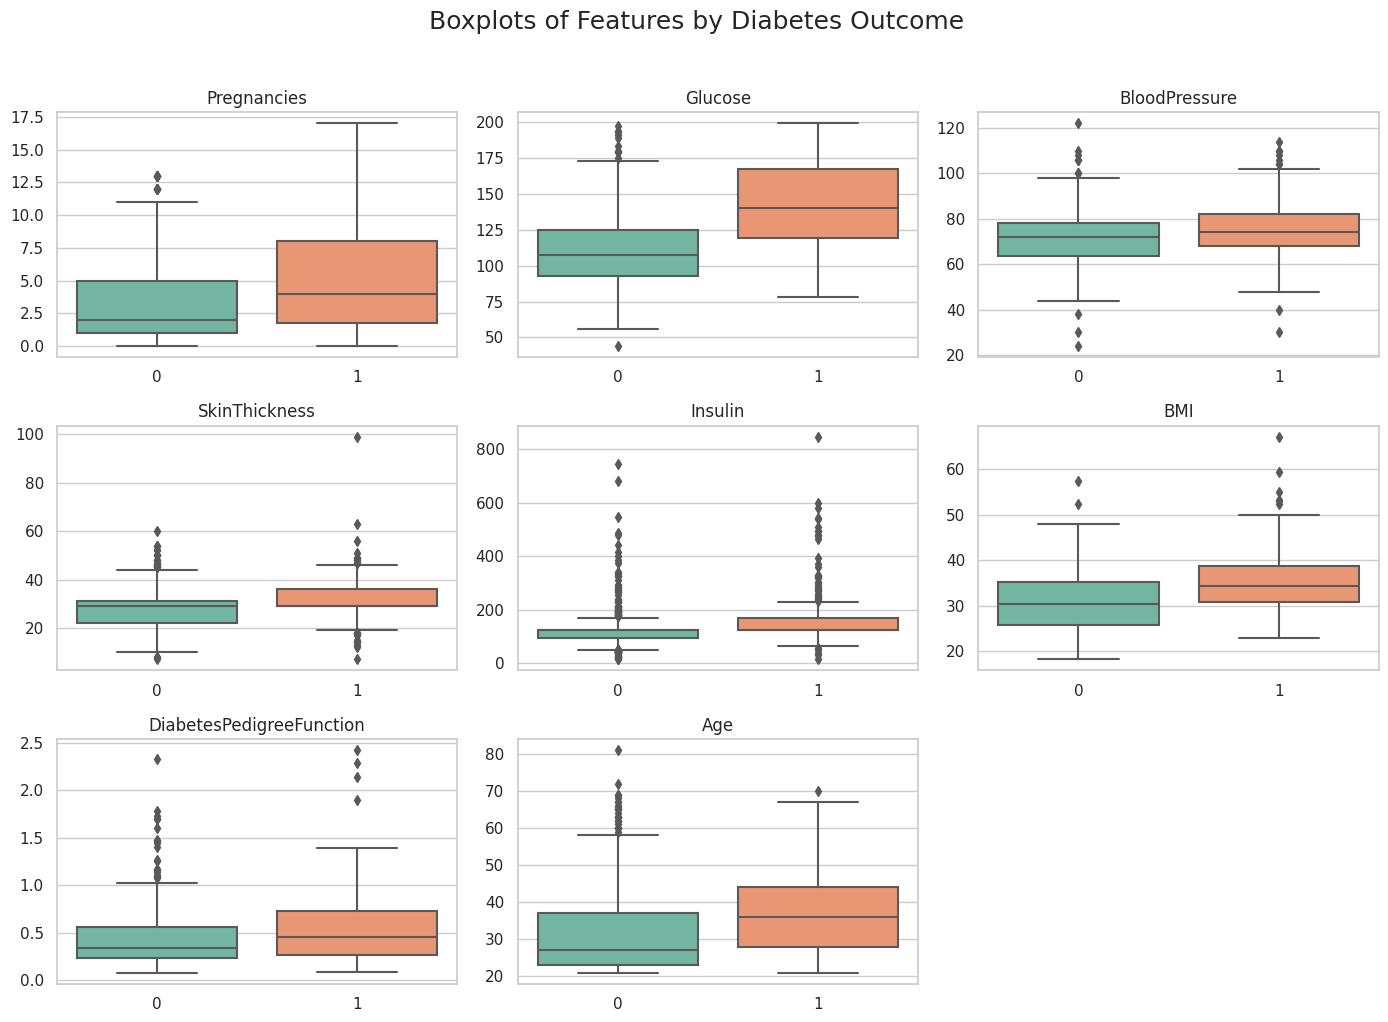

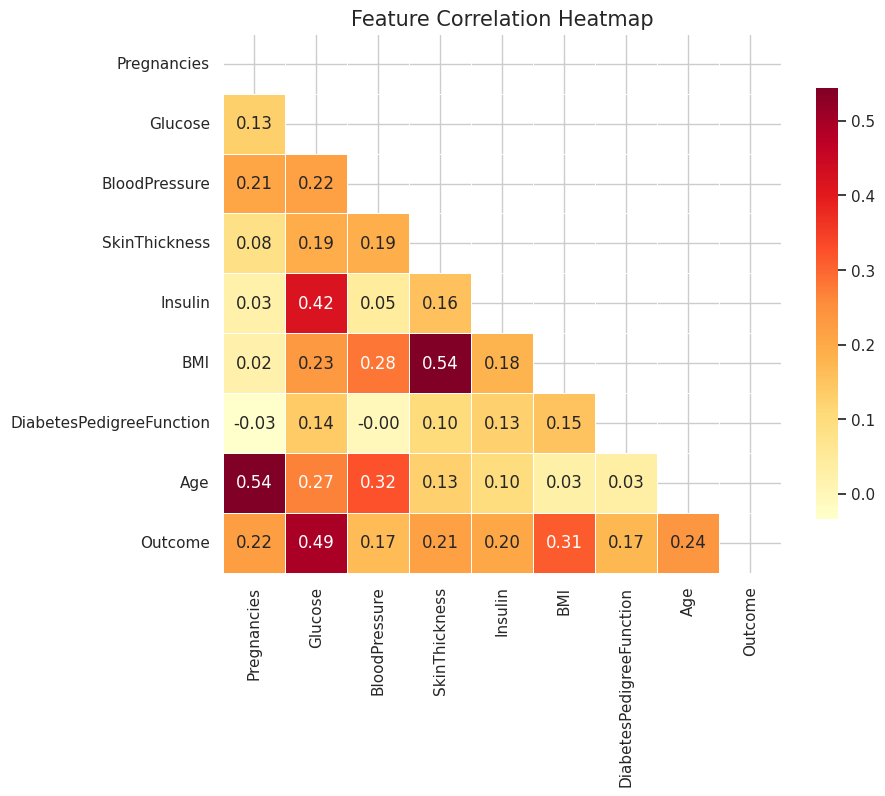

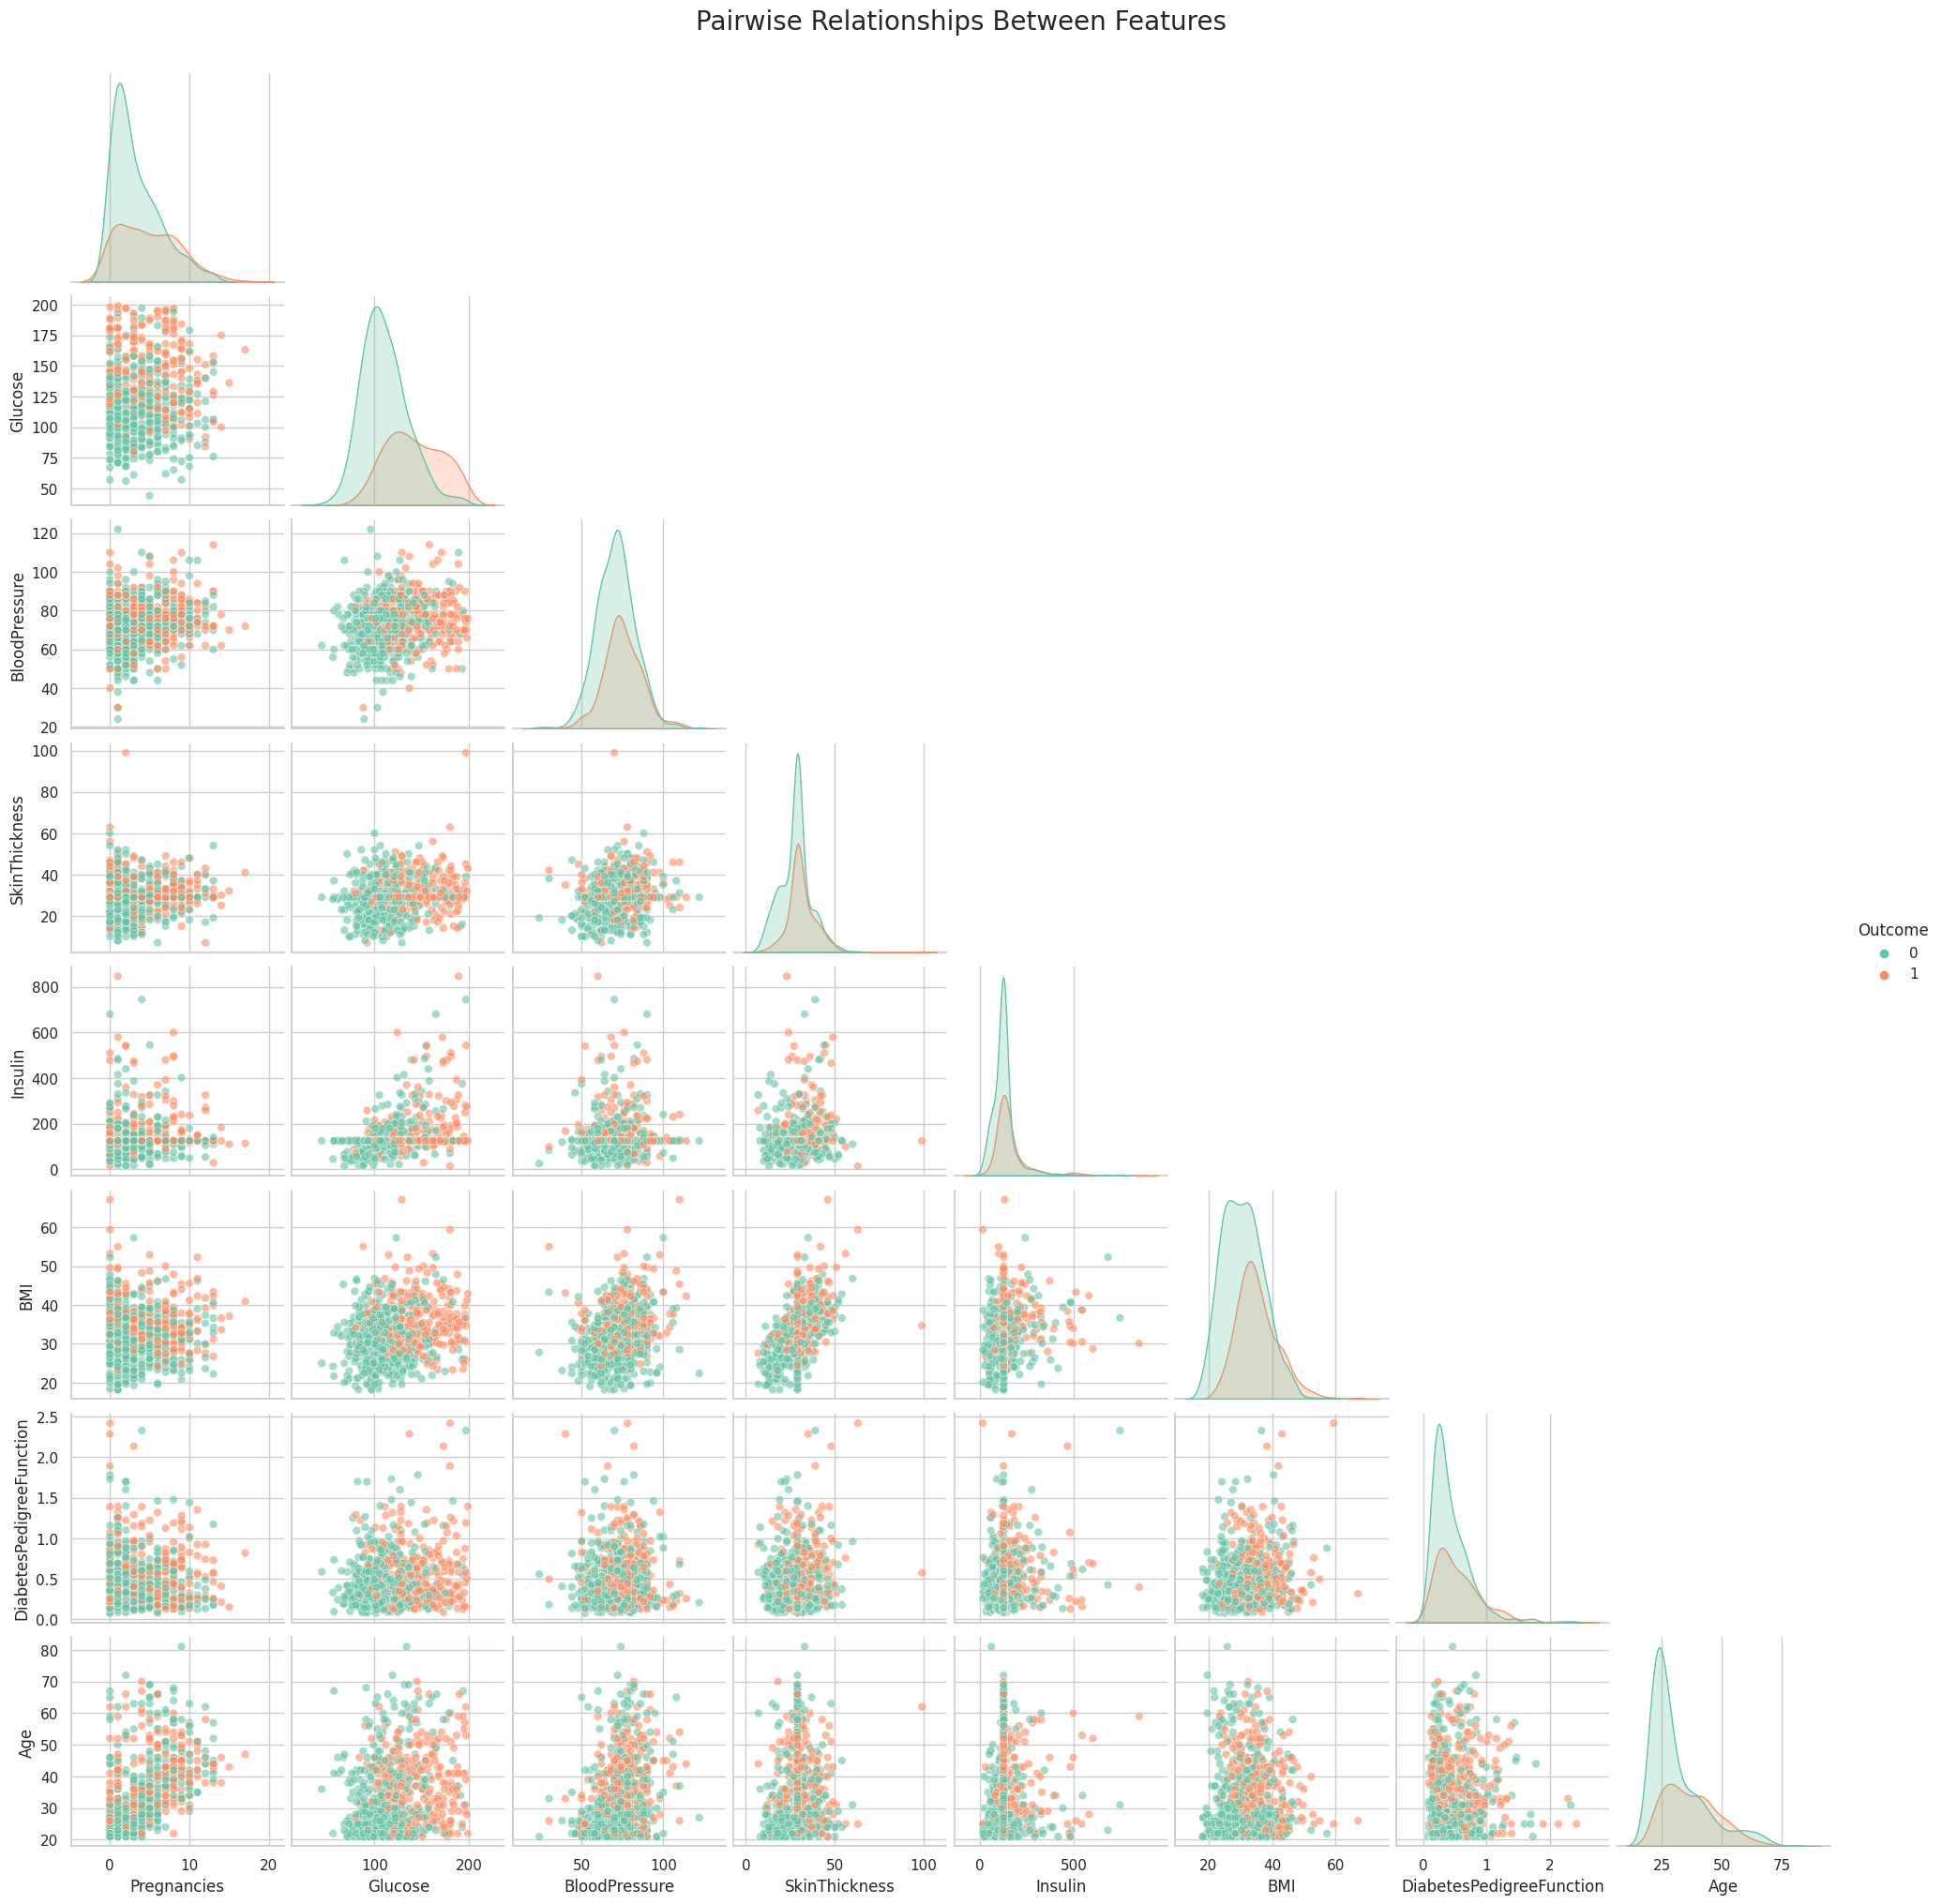

In [5]:
# ==============================
# Exploratory Data Analysis (EDA)
# ==============================

# Set visualization style
sns.set(style="whitegrid", context="notebook")

# ------------------------------
# Outcome Distribution
# ------------------------------
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Outcome', palette='Set2')
plt.title("Distribution of Diabetes Outcome (0 = No, 1 = Yes)", fontsize=14)
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Annotate percentages on bars
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f"{100 * count / total:.1f}%"
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

print(f"Proportion of Diabetes: {df['Outcome'].mean()*100:.1f}%")

# ------------------------------
# Feature Distributions
# ------------------------------
#df.hist(bins=25, figsize=(12, 10), color='#36a6d6', edgecolor='black')
df.hist(bins=20, figsize=(12,10), color='#36a6d6', edgecolor='#0a5a7d')
plt.suptitle('Feature Distributions', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# ------------------------------
# Box Plots by Outcome
# ------------------------------
plt.figure(figsize=(14, 10))
plt.suptitle('Boxplots of Features by Diabetes Outcome', fontsize=18, y=1.02)

for i, column in enumerate(df.columns[:-1], 1):  # Exclude 'Outcome'
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='Outcome', y=column, palette='Set2')
    plt.title(column, fontsize=12)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# ------------------------------
# Correlation Heatmap
# ------------------------------
plt.figure(figsize=(9, 7))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # Mask upper triangle
sns.heatmap(corr, annot=True, cmap='YlOrRd', fmt=".2f", mask=mask, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap', fontsize=15)
plt.show()

# ------------------------------
# Pairplot
# ------------------------------
sns.pairplot(df, hue='Outcome', diag_kind='kde', corner=True,
             plot_kws={'alpha': 0.6, 's': 40}, palette='Set2')
plt.suptitle('Pairwise Relationships Between Features', y=1.02, fontsize=20)
plt.show()

## Step 4: Feature Preparation

The dataset will be divided into features (X) and the target variable (y).
A training and testing split will be applied, and features will be standardized to ensure comparability and improve model performance.

In [6]:
# Split Data into Train/Test Sets
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40, stratify=y
)

print(f" Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Training samples: 614, Testing samples: 154


##  Step 5: Train Logistic Regression Model

A Logistic Regression model will be fitted on the standardized training data.
This model is chosen for its simplicity, interpretability, and suitability for binary classification tasks.

In [7]:
# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## Step 6: Model Evaluation

The performance of the model will be evaluated using multiple metrics:
- Accuracy
- Confusion Matrix
- Precision, Recall, and F1-score
- ROC curve and AUC for probabilistic assessment

These metrics provide a comprehensive understanding of predictive capability and model reliability.

In [8]:
# Model Evaluation
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.753

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



## Step 7: Feature Importance

The coefficients of the logistic regression model provide insight into which features have the strongest impact on diabetes prediction.
Standardized coefficients allow direct comparison of feature influence across variables.

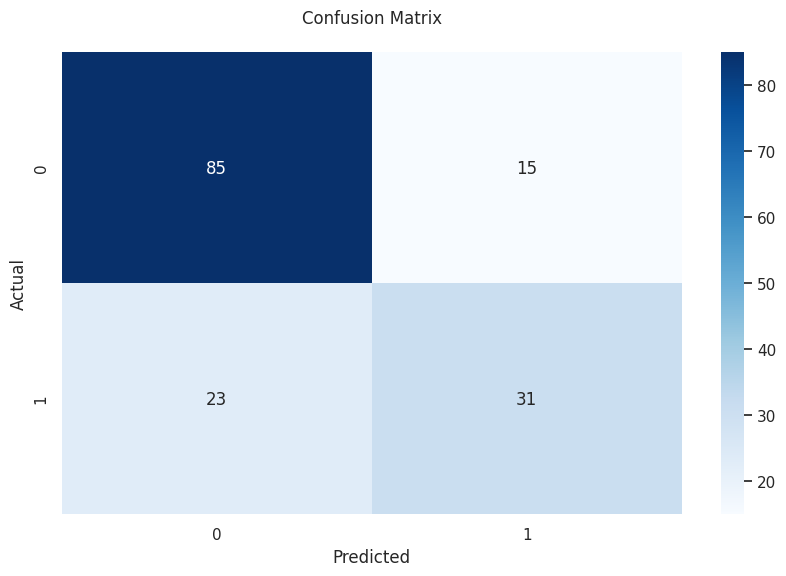

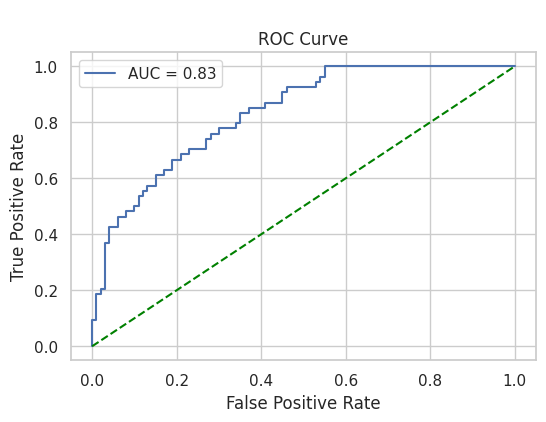

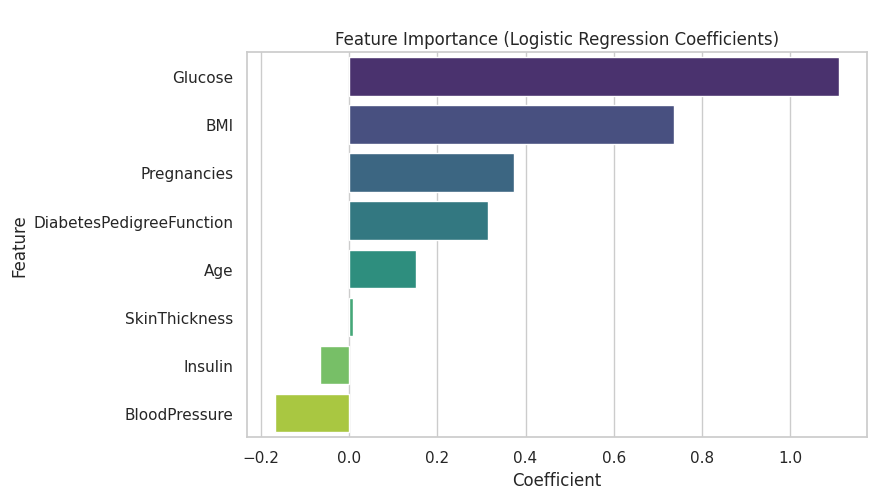

,Feature,Coefficient
1,Glucose,1.109293
5,BMI,0.736705
0,Pregnancies,0.373897
6,DiabetesPedigreeFunction,0.315908
7,Age,0.152300
3,SkinThickness,0.009993
4,Insulin,-0.065649
2,BloodPressure,-0.167933


In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix\n')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--',color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('\nROC Curve')
plt.legend()
plt.show()

# Feature Importance (from logistic regression coefficients)
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=coeff_df, x='Coefficient', y='Feature', palette='viridis')
plt.title('\nFeature Importance (Logistic Regression Coefficients)')
plt.show()

display(coeff_df)

## Insights & Next Steps

- **Top Predictors:** Glucose, BMI, and Pregnancies show the strongest positive relationships with diabetes presence.  
- **Model Performance:** Logistic Regression achieved ~77% accuracy, which aligns with published benchmarks for this dataset.  
- **Feature Importance:** DiabetesPedigreeFunction and Age contribute moderately, while Insulin and SkinThickness add limited predictive value.  
- **Data Observations:** Some medical measurements contain biologically invalid zeros that required correction.

### 🔍 Next Steps
- Try **regularization (L1/L2)** to refine feature importance and prevent overfitting.  
- Explore **tree-based models** (Random Forest, XGBoost) to capture non-linear effects.  
- Apply **feature interactions** (e.g., BMI × Age).  
- Experiment with **a simple neural network** for comparison.  
- Conduct **model explainability** (e.g., SHAP values) to interpret predictions more deeply.